#   <u><font color=blue>__Course: Modeling & Computational Engineering (MOD510)__</font></u> 
##  <font color=blue>Professor: __Aksel Hiorth__ | Aksel.Hiorth@uis.no</font>
#### <font color=blue> https://github.com/ahiorth/CompEngineering</font>
## 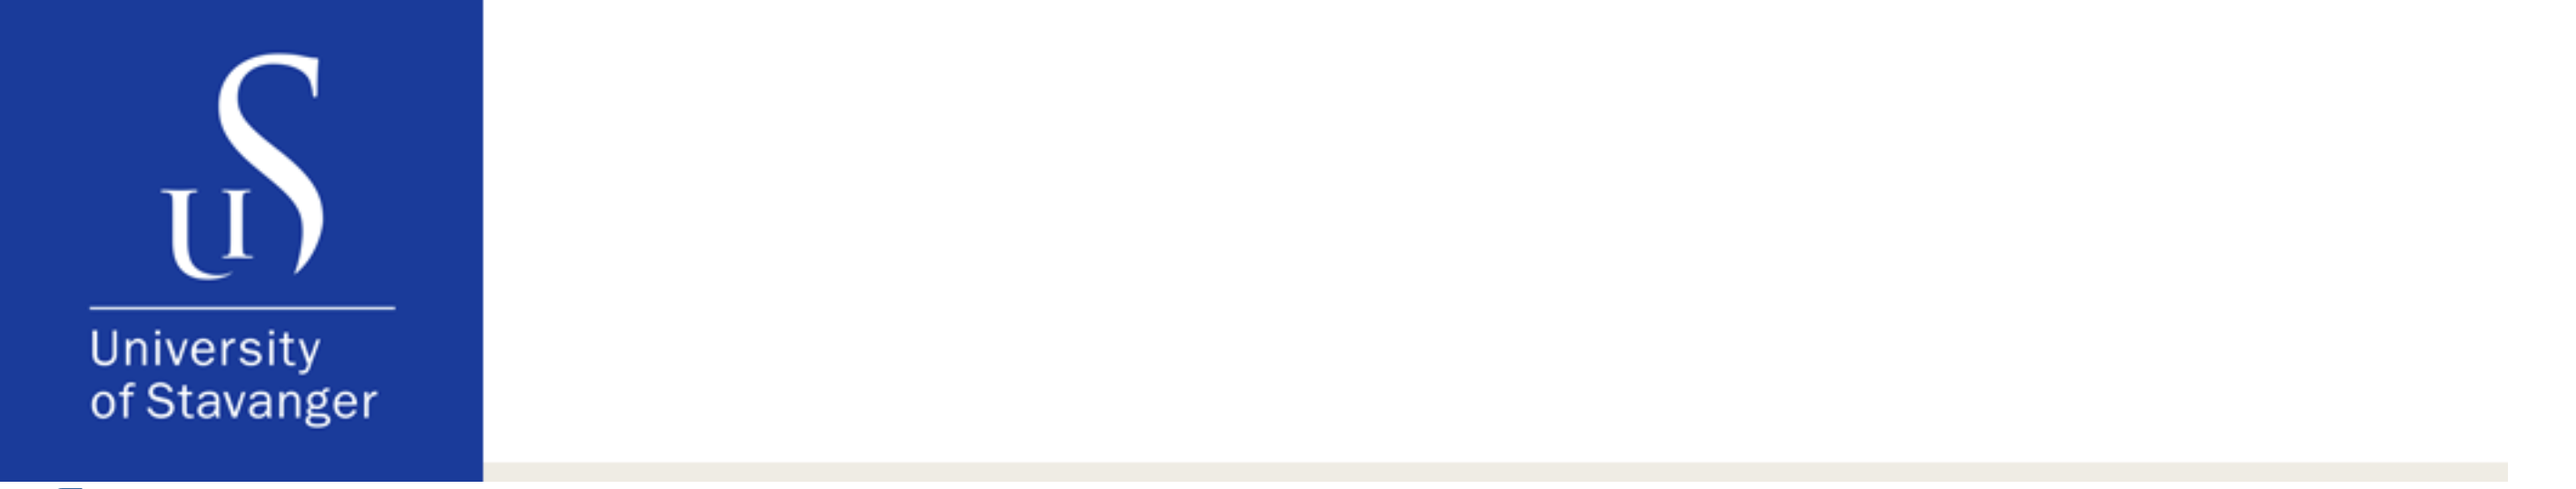
 



# <u><font color=green>__Project 2 | MOD510__</font></u>  
 
 
 

- Name: __`Aleksander Storhaug Strøm`__
- StudentNr: __`239655`__


- Name: __`Einar Gramstad Salomonsen`__
- StudentNr: __`245298`__


- Name: __`Eric Severson`__
- StudentNr: __`261873`__

# <u><font color=blue>__Abstract:__</font></u> 

#### Includes outline of Project Summary. `(Brief Intro, Body, & Conclusion)`



`Intro:` The goal of Project 2 was to iteritevely solve an ODE (Radial Diffusifity Equation) and visualize the solution (Pressure) at various time(s) given an initial condition for our system (Inital Pressure at t = 0). With this solver, we sought to load Observed Data: (perm_data.dat & well_test.dat) and better understand our Reservoir properties.

`Body:` By utilizing the Radial Diffusivity Equation and Darcey's Law we have an Ordinary Differential Equation (ODE) which can be solved using various method(s). By discretizing this ODE and applying the initial boundary conditions we are able to solve for the Pressure Distribution from our wellbore (Rw) to the extend of the reservoir (Re).
    
`Conclusion:` Provided the Observed Data, we are able to return the Pressure Distribution at a particular time (T) and Distance from the Wellbore (R), uing both the analytical solution and discritization of our reservoir into N number of grid blocks. When comparing methods we found that they followed a similar trend, with larger discritization of the reservoir a smaller error is observed between the methods. When matching the solutions to our observed data it shows that the analytical solution does not take into account the length of the reservoir, unlike the numerical solution. Thus, by matching the numerical solution to the data we can extract the re (reservoir length).  
    

# <u><font color=blue>__Project 2 Introduction:__</font></u> 

#### Major Objectives:

- Solve different matrices
- Perform linear regression to obtain the best fitting slope and estimate the permability.
- Evolving the RadialDiffusivityEquationSolver class, to cover more in depth ODE implementations, specificially the discritization of the ODE.
- Analyize the difference between Sparse and Dense matrix solers and the impact it can have on the rate of convergence on the solution
- Estimate the reservoir properties, and make predictions of the reservoirs content by matching the solution to observed data (tuning).

# <u><font color=red>__Exercise 1: Darcy`s law__</font></u> 
## Excercise 1: Introduction
- Imports a datafile which have plotted that amount of pressure vs the flow rate, exploring properties by utilizing the concept of linear regression

### Part 1
#### Intro
- We seek to read observed data stored in the file `perm_data.dat.` and make a scatter plot of ΔP versus Q.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
df = pd.read_csv(r'project2\data\perm_data.dat', sep = '\t', skiprows = 4)

In [7]:
plt.scatter(df['q[ml/s]'], df['DP[atm]'])

plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.grid()
plt.show()

NameError: name 'df' is not defined


#### Comments
- By using pandas to read the datafile, it was possible to leave out the unecessary rows of the file, by this it was possible to display the data in clean manner. Data is displayed as an scatter plot

### Part2
#### Intro
- We apply linear regression via the gradient decent method in order to estimate the `slope`,`intersection` of the data, and estimate the permeability (k) from Darcey's Equation.

In [4]:
def S(b, x=df['q[ml/s]'], y = df['DP[atm]']):
    """
    Parameters
    --------------
    b= The intercept & the slope of the line
    x= Extracted data
    y= Extracted data
    
    Returns
    --------------
    Least square measure
    
    """
    return np.sum((y-b[0]-b[1]*x)**2)    

def dS(b, y=df['DP[atm]'], x=df['q[ml/s]'],):
    """
    Parameters
    --------------
    b= The intercept & the slope of the line
    x= Extracted data
    y= Extracted data
    
    Returns
    --------------
    Derivated least square measure
    """
    return np.array([-2*np.sum(y-b[0]-b[1]*x),
                     -2*np.sum((y-b[0]-b[1]*x)*x)]) 

def plt_regression_line(b, x=df['q[ml/s]'], y=df['DP[atm]'], l_rate = 1e-2, dS = dS, S = S, maxit = 1000, E = 1e-3):
    """
    Linear regression via the gradient decent method
    
    Parameters
    --------------
    b= The intercept & the slope of the line
    x= Extracted data
    y= Extracted data
    l_rate = Learning rate
    maxit= Maximum number of iterations
    E= Tolerance 
    
    Returns
    --------------
    The intercept & the slope of the line
    & plots the solution
    """
    plt.scatter(x, y, s = 30)
    n=0
    y_pred = 0

    while n < maxit:
        
        y_prep = b[0] + b[1]*x
        
        ds = dS(b)
        
        b[0] = b[0] - l_rate * ds[0]
        b[1] = b[1] - l_rate * ds[1]
        
        n+=1
    
        if n >= maxit or S(b) < E:
            plt.plot(x, y_prep, label = 'Gradient decent solution')
            print('Slope = {} \nIntersection = {} \nS = {} \nNumber of iterations = {}'. format(b[1], b[0], S(b), n))
            return b
        
        else:
            pass
     
b = plt_regression_line([0, 0])
slope_lin = b[1]
intercept_lin= b[0]
#scipy.stats.linregress

def perm(slope_DP_Q):
    L = 7
    mu = 1
    A = np.pi * (3.8/2)**2
    return 1/(slope_DP_Q * (A/(mu*L)))

print('The estimated permability is {} mD \n'.format(perm(slope_lin)))

##### True solution
print(stats.linregress(df['q[ml/s]'], df['DP[atm]']))
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df['q[ml/s]'], df['DP[atm]'])

def linre(slope, intercept, x):
    """
    
    Parameters
    --------------
    slope= Slope
    intercept= Intercept
    q= array
    
    Returns
    --------------
    Generates an array consistent with a linear function given the slope & 
    the intercept and an x-array
    """
    return slope * x + intercept

plt.scatter(df['q[ml/s]'], df['DP[atm]'])
plt.plot(df['q[ml/s]'], linre(slope, intercept, df['q[ml/s]']), label = 'True Solution')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.grid()
plt.show()

NameError: name 'df' is not defined

#### Comments
- Visually this regression line seems to be tilted in a sensible manner when considering how the scatter plot trends upwards. The regression line returns several features with respect to our example: Estimates the slope, r- & p-values, standard deviation of the generate regression line. The intersection indicates where the line crosses the y-axis(`DP[atm]`), and the slope value gives information on how rapid the slope increases in `DP[atm]` per `1.00 ml/s`. To further validate this implementation, we included the analytical solution by using the stats.lingress function. Through observering both analytical and output returned by our user-defined function we can see they match well. Perhaps if we had more data points we could decrease the uncertainty. We can therefore conclude that the regression line has been properly coded. When assessing the Gradient decent solution line and the True solution, it can be observered that they are perfectly overlaping. The permability estimated (~ 0.1827 mD) using the slope and equation (2)(from the problem describtion) is within exceptible margins.

# <u><font color=red>__Exercise 2: RadialDiffusivityEquationSolver__</font></u> 



### Introduction Excercise 2
- This excercise will be focused on evolving the RadialDiffusivityEquationSolver class to easily call on several functions that are given within this class without the need to globally define each parameter, variables, and respective functions. This can be helpful to save processor usage specifically in regards to fast convergence. The content within the class are Solver functions which can be helpful to call conversion factors to shift from Imperial --> SI units, and visa versa. The functions created are also helpful for pressure estimation and generation of plots and analytical generated solution, hence also numerical solutions. Parts of this excercise will be devoted to transforming to a different coordinate system. The analytical generated solution allowed us to study the reliability of the coordinate transformation. 


## Add stuff about part 5 & 6 

## The Solver, used in Excercises 2-4

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.special as sp
import scipy.sparse.linalg as lin
import numpy.linalg as linalg
import pandas as pd
import time as time

In [10]:
class RadialDiffusivityEquationSolver:
    """
    A finite difference solver for the radial diffusivity equation.
    We use the coordinate transformation y = ln(r/rw) to set up and
    solve the pressure equation.

    The solver uses SI units internally, while "practical field units"
    are required as input.

    Except for the number of grid blocks / points to use, all class
    instance attributes are provided with reasonable default values.

    Input arguments:

        name                                symbol      unit
        --------------------------------------------------------------
        Number of grid points                N          dimensionless
        well radius                          rw         ft
        extent of reservoir                  re         ft
        height of reservoir                  h          ft
        permeability                         k          mD
        porosity                             phi        dimensionless
        fluid viscosity                      mu         mPas (cP)
        total compressibility                ct         1 / psi
        constant flow rate at well           Q          bbl / day
        initial reservoir pressure           pi         psi
        constant time step                   dt         days
        maximal simulation time          max_time       days
        -------------------------------------------------------------
    """

    def __init__(self, N, rw=0.328, re = 100000., h=8.0,
                 k=500, phi=0.1, mu=1.0, ct=17.7e-6,
                 Q=1000, pi=2000, dt=0.1, max_time=10):

        # Unit conversion factors (input units --> SI)
        self.ft_to_m_ = 0.3048
        self.psi_to_pa_ = 6894.75729
        self.day_to_sec_ = 24*60*60
        self.day_to_hours = 24
        self.bbl_to_m3_ = 0.1589873

        # Grid
        self.N_ = N
        self.rw_ = rw*self.ft_to_m_
        self.re_ = re*self.ft_to_m_
        self.h_ = h*self.ft_to_m_

        # Rock and fluid properties
        self.k_ = k*1e-15 / 1.01325
        self.phi_ = phi
        self.mu_ = mu*1e-3
        self.ct_ = ct / self.psi_to_pa_

        # Initial and boundary conditions
        self.Q_ = Q*self.bbl_to_m3_ / self.day_to_sec_
        self.pi_ = pi*self.psi_to_pa_

        # Time control for simulation
        self.dt_ = dt*self.day_to_sec_
        self.max_time_ = max_time*self.day_to_sec_
        self.current_time_ = 0.
        
        # stuff
        self.eta = self.k_/(self.mu_*self.phi_*self.ct_)
        
        #                   ------Excercise 2 Part 4-----
        # Array of midpoints 
        self.dy = np.log(self.re_/self.rw_)/self.N_
        self.y_midpoints = np.linspace(np.log(self.rw_/self.rw_)+self.dy/2, np.log(self.re_/self.rw_)-self.dy/2, self.N_)
        self.r_midpoints = self.rw_ * np.exp(self.y_midpoints) 
        
        
        #                       ------- Excercise 3--------
        # Defining beta for the sparse matrix setup
        self.beta = ((self.Q_*self.mu_*self.dy)/(2 * np.pi *self.k_*self.h_))
        
        
        self.A_=None
        self.A_sparse = None
        
        self.xi=((self.eta * np.exp(-2 * self.y_midpoints)*self.dt_)/((self.rw_**2)*(self.dy**2)))
        self.setup_matrix()
        
        self.t_array = np.arange(0, self.max_time_ + self.dt_, self.dt_)
        
        
   



    
     #                    --------Excercise 2 Part 1 ---------
    def line_source_solution(self, r, t):
        """
        Returns the analytical solution for the pressure using the radius and the time as variables.

        Parameters
        ----------
        r : Radius
            units:[Meters].
        t : Time
            [seconds].

        Returns
        -------
        Pressure[Pa]
        

        """
        t = t*self.day_to_sec_
        W = sp.expi(-(r**2)/(4*self.eta*t))
        return (self.pi_ +(((self.Q_*self.mu_)/(4*np.pi*self.k_*self.h_)) * W)) 
        
    
    
    
    
      #                 ---------Excercise 2 Part 1 ---------
    def plot_line_source_solution(self, r_max, t): 
        """
        plots the pressure against the radial distance at a given time.

        Parameters
        ----------
        r : Radial Distance
            units:[Meters].
        t : Time
            units:[Seconds].

        Returns
        -------
        Plot of pressures throughout the reservoir.

        """
        r_max = r_max*self.ft_to_m_
        r = np.linspace(self.rw_, r_max, self.N_)
        if  type(t) != np.ndarray:
            
            pressure = self.line_source_solution(r, t)
            plt.plot(r, pressure/self.psi_to_pa_, label='Pressure at time {} days'.format(t))
            
        else:
        
            t_array = t
            
            for t in t_array:
                pressure = self.line_source_solution(r, t)
                plt.plot(r, pressure/self.psi_to_pa_, label='Pressure at time {} days'.format(t))
        
        plt.legend()
        plt.xlabel('Radial distance r [Meters]')
        plt.ylabel('Pressure p [Psi]')
        plt.show()
        
        return None
    
    
    
    
    
      #                      -------Excercise 2 Part 4 -------
    def plot_solution_using_y_midpoints(self, t):
        """
        
        Parameters
        -----------------------
        t: Time 
           units:[Seconds]
        Returns
        -------------------------
        A plots the pressures throughout the reservoir in y-coordinate system
        
        """
        if  type(t) != np.ndarray:
            pressure = self.line_source_solution(self.r_midpoints, t)
            plt.plot(self.r_midpoints, pressure/self.psi_to_pa_, label='Pressure at time {} days'.format(t))
            
        else:
            t_array = t
            
            for t in t_array:
                pressure = self.line_source_solution(self.r_midpoints, t)
                plt.plot(self.r_midpoints, pressure/self.psi_to_pa_, label='Pressure at time {} days'.format(t))
        
        plt.xscale('log')
        plt.legend()
        plt.xlabel('Radial distance r [Meters]')
        plt.ylabel('Pressure p [Psi]')
        plt.show()
        
        return pressure
        
        
        
        
        
  
      #                     -------Excercise 3 Part 1 -------
    def setup_matrix(self):
        """
        Creation of sparse and dense matrices
       
        Parameters
        ----------------------------
        Extracts needed parameters from the class
       
        returns
        ----------------------
        Generate the dense and sparse matrices for the class in the __init__ function
        """
       
        # making dense part 1
        a=-self.xi[1:]
        b=1+2*self.xi
        b[0]=1+self.xi[0]
        b[-1]=1+self.xi[-1]
        c=-self.xi[:self.N_-1]
        
        # making sparse part 1
        d = np.zeros((3, self.N_))
        d[0, :-1] =a
        d[1,] = b
        d[2,1:] = c
        
        # making dense part 2
        self.A_=np.diag(a,-1)+np.diag(b,0)+np.diag(c,1)
        
        # making sparse part 2
        self.A_sparse = sc.sparse.spdiags(d, [-1, 0, 1], self.N_, self.N_, format = 'csc')
        
        
        
        
        
        
        
     #                       -------Excercise 3 Part 1 -------
    def rhs_0(self):
        """
        Creation of the original right-hand-side wheras the first step is 
        
        Parameters
        ----------------------------------
        Extracts needed parameters from the class
        
        Returns
        ----------------------------------
        The first right-hand-side for t=0
        """
        rhs_0 = np.zeros(self.N_)
        rhs_0[:] = self.pi_
        rhs_0[0] = (self.pi_ - (self.xi[0] * self.beta))
        return rhs_0
    
    
    
    
    
    
      #                    -------Excercise 3 Part 1 -------
    def rhs_dense(self):
        """
        
        Parameters
        ------------------
        Extracts needed parameters from the class
        
        Returns
        --------------------
        Calculates the first pressure solution for t = dt by using the numpy.linalg function which
        will take the inputs of the N_ x N_ matrix and the generally defined 
        right_hand_side function `rhs_0()`
        """
        
        rhs = linalg.solve(self.A_, self.rhs_0())
        #rhs[0] = rhs[0] -(self.xi[0] * self.beta)
        return rhs
    
    
    
    
    
      #                      --------Excercise 3 Part 1  --------
    def rhs_sparse(self):
        """
        A right-hand-side solver for the sparse matrix
        
        Parameters
        --------------------
        Extracts the needed parameters from the class
        Returns
       ---------------------
       Calculates the first pressure solution for t= dt taking the inputs of 
       self.A_sparse equation and the generally defined right-hand-side function
       rhs_0(). Returns the result of the lin.spsolve function
        
        """
        rhs = lin.spsolve(self.A_sparse, self.rhs_0())
        #rhs[0] = rhs[0] -(self.xi[0] * self.beta)
        return rhs
                  
        
        
       #                -------- Excercise 3 Part 2 ---------
    def p_array_res(self,sparse=True):
        
        """
        A right-hand-side solver for the sparse matrix
        
        Parameters
        --------------------
        Extracts the needed parameters from the class
        Returns
       ---------------------
       Calculates the pressure solution throughout the reservoir by returning an array of the pressure solutions 
       for both radial distance and the time steps.
       
        
        """
        p_M = []
        

        p_0 = np.zeros(self.N_)
        p_0[:] = self.pi_
        p_M.append(p_0)
        
        
        if sparse == True:
            # do sparse
          
            for n in range(len(self.t_array)-1):
                rhs = p_M[n].copy()

               
                rhs[0] = rhs[0]-(self.xi[0] * self.beta)
                
                
                p_n = lin.spsolve(self.A_sparse, rhs)
                                 
                p_M.append(p_n)

        else:
                #do dense
            for n in range(len(self.t_array)-1):
                rhs = p_M[n].copy()


                rhs[0] = rhs[0]-(self.xi[0] * self.beta)
 
                
                p_n = linalg.solve(self.A_,rhs)
                               
                p_M.append(p_n)
        
        
        return np.array(p_M)
    
    
    
     #                         --------Excercise 4 Part 2 & 3---------- 
    def well_pressure(self, sparse = True):
        """
        A right-hand-side solver for the sparse matrix
        
        Parameters
        --------------------
        Extracts the needed parameters from the class.
        And takes an input of sparse = True or False to determine 
        if the sparse or dense solver is used.
        
        Returns
        ---------------------
        Estimates the pressure close to the well by using the sparse or the dense solvers
        in combination with the taylor expansion assuming the increase of pressure at the 
        well is equal beta/2, assuming the next grid point is dy/2
        
        """
        pressure_res = self.p_array_res(sparse = sparse)
        well_p = []
        well_p.append(self.pi_)
        for n in range(len(self.t_array)):
            if n == 0:
                pass
            else:

                p0 = pressure_res[n, 0] -(self.beta/2)
                well_p.append(p0)

        
        return np.array(well_p)
        
        
        
        
      #                      ----------Excercise 4 Part 4 ---------
    def well_pressure_ana(self):
        """
        A right-hand-side solver for the sparse matrix
        
        Parameters
        --------------------
        Extracts the needed parameters from the class
        
        Returns
        ---------------------
        Estimates the pressure close to the well by using the analytical solution 
        in combination with the taylor expansion assuming the increase of pressure at the 
        well is equal beta/2, assuming the next grid point is dy/2
        
        """
        #r = self.r_midpoints
        r = np.linspace(self.rw_, self.re_, self.N_)
        well_p_a = []
        well_p_a.append(self.pi_)
        
        for t in self.t_array:
            if t == 0:
                pass
            else:
                p0 = self.line_source_solution(r, t/self.day_to_sec_)[0]

                pw = p0 - (self.beta/2)

                well_p_a.append(pw)
        return np.array(well_p_a)
    
    
    
    
    
    #                            ---------Excercise 4 Part 4 ----------
    def plot_numerical_and_analytical_solution_against_data(self, path = 'project2/data/well_test.dat', skiprows = 3, sep = '\t', sparse = True):
        """
        
        
        Parameters
        --------------------
        Extracts the needed parameters from the class
        Imported dat file seperated by 3 rows
        Sparse matrix used
        
        Returns
        ---------------------
        A plot which includes the numerically generated values and the analytical estimated values
        against the imported realistic data. 
        """
        t_array = self.t_array/(60*60)
        pw_num = self.well_pressure(sparse=sparse)/solver2.psi_to_pa_
        pw_ana = self.well_pressure_ana()/solver2.psi_to_pa_
        t_array = self.t_array/(60*60)
        
        #df = pd.read_csv(path,  skiprows = skiprows,  sep = sep)
        
        plt.plot(t_array, pw_num, 'red', label = 'numerical solution')
        plt.plot(t_array, pw_ana, label = 'analytical solution') 
        plt.scatter(df['time'], df['well_pressure'])
        plt.xscale('log')
        plt.legend()
        plt.xlabel('{} (hours)'.format(df.columns[0]))
        plt.ylabel('{} (psi)'.format(df.columns[1]))
        plt.grid()
        plt.show()
        
        return None
    
    
    
    #                            ---------Excercise 4 Part 5 --------------
    def volume(self):
        """
        
        Parameters
        -----------------
        Extracted needed parameters from the class
        
        Returns
        -----------------
        The estimated volume of fluids.
        """
        Vf=((np.pi**2)*((self.re_**2-self.rw_**2)*self.h_*self.phi_))
        return Vf


### Part 1
#### Intro
- `!! Located within the class RadialDiffusivityEquationSolver !!`


- In part 1 we are defining functions(line_source_solution & plot_line_source_solution) within the class of RadialDiffusivityEquationSolver, this will provide an analytical solution to pressure estimation of a reservoir

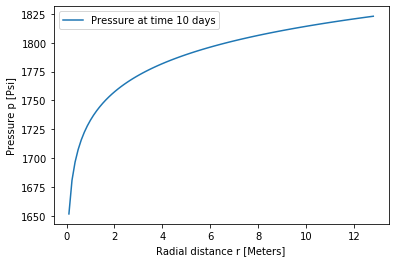

In [11]:
solver = RadialDiffusivityEquationSolver(100)

solver.plot_line_source_solution(42, 10)

#### Comments
- These functions are able to estimate the analytical solution based on equation(16) & equation(17), this results in the function of line_source_solution(). To manage the plot visualization of the data, there is a custom function that will use the output of `line_source_solution()` to create a plot of this output within the function of `plot_line_source_solution()`. In the line_source_solution, the time parameter t is converted from days to seconds to be implemented in the exponential constant of `W`. This means all inputs of t will be assumed in days and then converted to seconds. Furthermore, the calculation itself of the function is estimated in SI-units and will result in a solution returned in SI-units, aside from the pressure displayed in psi. The reason for using Psi over Pa is due to the plot being easier to analyze with respect to the y-axis.
- In plot_line_source_solution() there has been a code implemented to pass both array and singular scalars for time (t) throughout the plotting process `if type(t) != np.ndarray` & `else: t.array = t`. These dictate the process of plotting time properly.

### Part 2
#### Intro
- Display functionality of the functions created in part 1, in this part there is tested for many different situation. A specific time & specific radius, specific time, a specific radius and an array of times steps and if the function was able to run array's of both time and radial distances at simultaneously. Which seemed to succesful

Analytical plot default re


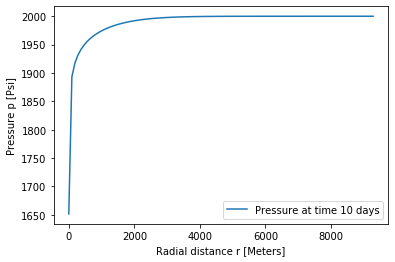

Analytical plot using re of 42


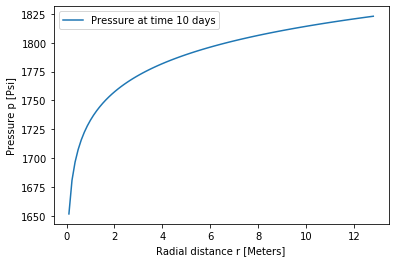

Analytical plot using t_array


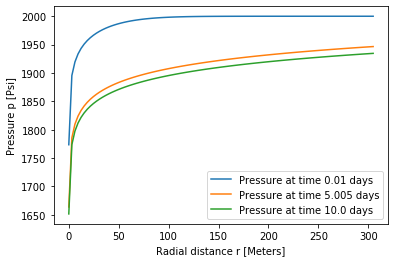

In [12]:
solver = RadialDiffusivityEquationSolver(100)
analytical=solver.line_source_solution(solver.re_,t=10)

print('Analytical plot default re')
analytical_plot_default_re=solver.plot_line_source_solution(solver.re_,t=10)

print('Analytical plot using re of 42')
analytical_plot_new_r=solver.plot_line_source_solution(42,t=10)

print('Analytical plot using t_array')
t=np.linspace(0.01,10,3)
analytical_plot_array_t=solver.plot_line_source_solution(1000,t)

#### Comments
- Our ideal solution increases toward the intial pressure as it gets further away from the well location. When we're plotting the analytical solution by a set position (`42 ft`) and a set time (`10 days`), it is possible to observe the most drastic decrease in pressure is 2-0 meters from the well position(`0 ft`). After this interval, the pressure increase will stabilize towards the initial reservoir pressure. It can be observed that even if we use plots with different time that the pressure line will consistently have a similar shape given position and in time. It is observed that as time increases the pressure curve will be displaced downwards. Implying pressure deacrease throughout the reservoir with time.  

### Part 3
#### Intro
- `!! Done within the class RadialDiffusivityEquationSolver !!`


- Observe the 2 implemented variable by the equation(18) & (19) from project details within the RadialDiffusitivity class. Refering to the variable of `dy` and `xi` . Can observe the transformation steps at in these functions in order to convert to an y-coordinate system. Will succesfully convert radial coordinate system to a y-referenced system.

Using the following transformation, show how Eqs 11, 12, and 13 are written as: $$ y(r) =  ln(\frac{r}{r_w})  $$

Differentiating y(r) $$ \frac{e^{y(r)}}{{r_w}} =  {r} $$

Solving for $r_w$: $$   {r_w}  = \frac{e^{y(r)}}{{r}} $$

Eq. 11 $$ \frac{dP}{dt} = \eta\frac{e^{-2y_i}}{r_w^2}\frac{d^{2}P}{dy^2} $$

Applying the Chain Rule as well as Substitution of $r_w$ to yeild Eq 19: $$ \frac{dP}{dt} = \eta \frac{e^{y(r)}}{{r}} \frac{e^{y(r)}}{{r}}  \frac{d^{2}P}{dy^2} =\eta\frac{e^{-2y_i}}{r_w^2}\frac{d^{2}P}{dy^2}  $$

Eq. 19 $$ \frac{dP}{dt} = \eta\frac{1}{r}\frac{d}{dr}({r}\frac{dP}{dr}) $$

Eq. 12 and 20 using the boundary condition at r=rw.  $$\frac{2 \pi hkr}{ \mu} \frac{dP}{dr} = Q $$ $$ \frac{dP}{dy} = \frac{Q\mu}{2\pi hk} $$ 

Eq. 21 Using the boundary condition at y=ye: $$ \frac{dP}{dy} = 0 $$ $$ \frac{dP}{dr} = \frac{dP}{dy} = 0 $$

#### Comments
- The function of `dy=np.log(self.re_/self.rw_)/N_` (from Eq(18)) converts the radial distance into the logarithmic y-coordinate system and after this becomes an input in the function of `self.xi=((self.eta * np.exp(-2 * self.y_midpoints)*self.dt_)/((self.rw_**2)*(self.dy**2)))`(from Eq(19)) this will convert pressures to match the time steps from the y-coordinate system. This is useful because it will cxonvert both the position coordinates and the time coordinate to match the new y-coordinates

### Part 4
#### Intro

- To succesfully convert this function into equally sized grid blocks in the y-coordinate system, it is required to use the calculation in order to transform from the r-coordinates to coordinates of y. To be able to convert to y-coordinate system, equation(18) has to be implemented into the solver.__init__() function in form of `dy=((self.re/self.rw)/self.N_)`.


- Furthermore, `self.y_midpoints` is defined in RadialDiffusivitySolver as a numpy.array, moves from `np.log(self.re/self.rw)+dy/2` to `np.log(self.re/self.rw)-dy/2` by `N_` steps. This calculation assures that each element will be at the center of these y-gridblocks.

- The r-coordinates are stored within `self.r_midpoints = self.rw_ * np.exp(self.y_midpoints) ` inversed from equation(18)

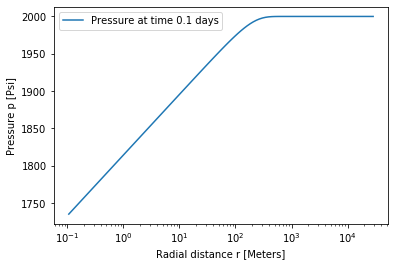

In [13]:
p = solver.plot_solution_using_y_midpoints(t =0.1)/solver.psi_to_pa_

#### Comments
- The graph is the analytical solution displayed in a plot. First we convert to y- coordinates by using the relation given in equation(18), and later invert their y_midpoints to return it to r-coordinates. The graph seems to be realistic in terms of the top pressure is given as 2000 which is the intial pressure, and starts to decline in pressure from x-axis around a position of 150-300 meters, which make sense due to the well position. Each step in radius is perfectly evened out in its logarithmic form. The coordinate transformation is logarithmic, the inverse transformation is therefore exponential. Thus using a logatithmic scale should create a linear profile as seen in the plot. Implying that the coordinate transformations are performing as expected. 

### Part 5
#### Intro
- Rewriting Eq. #24 with respect to each cell becomes the following for `(i = 0, 1, 2, 3)`
- Incorporating this into the discritization and implicit time steps we can solve for the pressures of all grid block cells with a high degree of stability. 
- The following demostrates the first initial steps one would have to do in order to turn it into a matrix representation equation. 

$$ \frac{p_i^{n+1} - p_i^n}{Δt} = \eta \times \frac{e^{-2y_i}}{r_w^2} \times \frac{p_{i+1}^{n+1} + p_{i-1}^{n+1} -2 p_{i}^{n+1}}{Δy^2}$$

Rearranging to create a constant term (Eta): $$ \xi_i = \eta \times \frac{Δte^{-2y_i}}{r_w^2*Δy^2}             $$

Simplified: $$ p_i^{n+1} - p_i^n = \xi_i \times ( p_{i+1}^{n+1} + p_{i-1}^{n+1} -2 p_{i}^{n+1})          $$

$$ p_i^{n+1} - \xi_i \times ( p_{i+1}^{n+1} + p_{i-1}^{n+1} -2 p_{i}^{n+1}) = p_i^n         $$

At i = 0: $$ p_0^{n+1} - \xi_0 \times ( p_{1}^{n+1} + p_{-1}^{n+1} -2 p_{0}^{n+1}) = p_0^n         $$

At i = 1 $$ p_1^{n+1} - \xi_i \times ( p_{2}^{n+1} + p_{0}^{n+1} -2 p_{1}^{n+1}) = p_1^n         $$

At i = 2 $$ p_2^{n+1} - \xi_2 \times ( p_{3}^{n+1} + p_{1}^{n+1} -2 p_{2}^{n+1}) = p_2^n         $$

At i = 3 $$ p_3^{n+1} - \xi_3 \times ( p_{4}^{n+1} + p_{2}^{n+1} -2 p_{3}^{n+1}) = p_3^n         $$

### Comments

- Please note when i = -1 and 4. These are both non-physical cells, however, with the inclusion of the 2 boundary conditions and rewriting the equations once more we arrive at the solution to part 6: 

### Part 6
#### Intro
- Our goal of part 6 is to apply our respective boundary conditions for dp/dr at both r=rw &r=re

$$ \frac{dP}{dr} = \frac{Q\mu}{2\pi hk} = p_{-1}^{n+1} - P_{0}^{n+1} $$

Boundary Condition 1 replaces the negative grid block cell: $$ p_{-1}^{n+1} = P_{0}^{n+1} + \frac{Q\mu}{2\pi hk} $$

Boundary Condition 2 replaces the (n+1) grid cell:$$ \frac{dP}{dr} = 0 = p_{4}^{n+1} - P_{3}^{n+1} $$

$$   p_{4}^{n+1} = P_{3}^{n+1} $$

Matrix Representation process (Grouping of like terms):$$ p_0^{n+1} - \xi_0 \times ( p_{1}^{n+1} + p_{-1}^{n+1} -2 p_{0}^{n+1}) = p_0^n   $$

$$ p_0^{n+1} - \xi_0 \times ( p_{1}^{n+1} + p_{0}^{n+1} - \frac{Q\mu}{2\pi hk} -2 p_{0}^{n+1}) = p_0^n   $$

$$ p_0^{n+1} - \xi_0 \times ( p_{1}^{n+1} + p_{0}^{n+1} - \beta -2 p_{0}^{n+1}) = p_0^n   $$

$$ p_0^{n+1}(1+2\xi_0) - \xi_0 p_{1}^{n+1}  + \xi_0\beta  = p_0^n   $$

i = 0: $$ p_0^{n+1}(1+\xi_0) - \xi_0 p_{1}^{n+1}  = p_0^n - \xi_0\beta   $$

i = 1: $$ p_0^{n+1}(1+2\xi_1) - \xi_1 p_{2}^{n+1}  = p_1^n   $$

i = 2: $$ p_2^{n+1}(1+2\xi_2) - \xi_2 p_{3}^{n+1}  = p_2^n   $$

i = 3: $$ p_3^{n+1}(1+\xi_3) - \xi_3 p_{2}^{n+1}  = p_3^n  $$

Taking the coefficiants from the 4 respective equations allows the $A$, $P^{n+1}$, & $P^{n}-d$  matricies to be formed as observed in Eq #25: 

#### Comments

- Replacing the unphysical grid block cells with boundary equations yields X number equations for N number grid block cells. This matrix representation clearly outlines the implicit finite difference method (n + 1 timestep). Solving for the solution yields the pressure distribution for the center of all grid block cells with respect to the next future timestep.  

# <u><font color=red>__Exercise 3: Implementing the Numerical Solver__</font></u> 

## Introduction

- Excercise 3 primarly seeks to solve the right-hand-side of the matrix for equation (25) in order to estimate the pressure(s) at the next timestep. There are two methods that will be implemented: The sparse matrix and the dense matrix approaches. These two methods will be evaluated in regards to which is most efficient while also computionally profficient. Two functions within the "RadialDiffusivityEquationSolver" class allowed for the population of dense and sparse matrices as well as an additional function which computes the intial right-hand-side `rhs_0()`. 


### Part 1
#### Intro
- `!! Done within the class RadialDiffusivityEquationSolver !!`


- The primarly focus of the 1st part is the creation of functions: `setup_matrix`. This function will create the intial matrix and populate both the dense matrix and the sparse matrix.
- 

- From then the calculation will include `rhs_0` which is the intial right-hand-side that has not been solved by the sparse nor the dense matrix. 

The correctly solved right hand sides for both sparse - and dense matrices should yield the same results, however the difference primarily depends on the computional requirements. `rhs_dense()` & `rhs_sparse()`

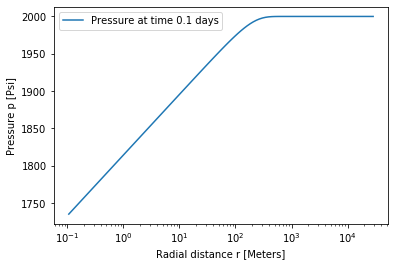

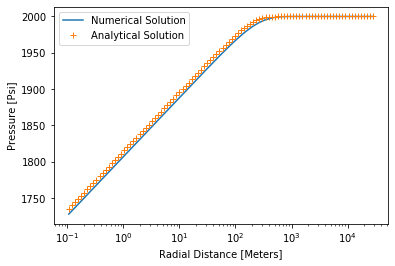

In [14]:
p = solver.plot_solution_using_y_midpoints(t =0.1)/solver.psi_to_pa_

p_M = solver.p_array_res()/solver.psi_to_pa_

plt.plot(solver.r_midpoints, p_M[2],label="Numerical Solution")
plt.plot(solver.r_midpoints, p, '+',label="Analytical Solution")
plt.xscale('log')
plt.xlabel('Radial Distance [Meters]')
plt.ylabel('Pressure [Psi]')
plt.legend()
plt.show()

### Comments
- 

### Part 2
#### Intro
- Creation of a function that will choose the most efficent method between sparse and dense matrix is created as `p_array_res`. If there is similar results of sparse and dense matrices to be consistent with the analytical results. The difference in efficency between these two solvers.

In [13]:
solver=RadialDiffusivityEquationSolver(N=100)
y, r = solver.y_midpoints, solver.r_midpoints
rhs_dense = solver.rhs_dense()/solver.psi_to_pa_
rhs_sparse = solver.rhs_sparse()/solver.psi_to_pa_
#print(rhs_sparse)



plt.plot(y,p,'-r',label="Analytical")
plt.scatter(y, rhs_dense,color='b',label="Dense")
plt.scatter(y, rhs_sparse,color='g',label="Sparse")
plt.xlabel("Y-Coordinate System [Dimensionless]")
plt.ylabel("Pressure [Psi]")
plt.legend()

plt.show()

NameError: name 'p' is not defined

In [19]:
%timeit solver.rhs_dense()/solver.psi_to_pa_
%timeit solver.rhs_sparse()/solver.psi_to_pa_

12.6 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
387 µs ± 74 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Comments
- In the matter of data both of these matrix solvers give the same results in the matter of pressure & position. Based on comparing the results, wew can conclude that both methods are consistent. When the analytical solution is compared to both sparse and dense methods, all seem to follow a similiar pattern (Please see the Chart above). There is a clear difference between the two solvers in terms of how long the functions use to generate identical solutions. The timeit function presents the superiority of the sparse approach. The reason we observe a time savings of approximately ~1,200X when comparing against the dense approach is primarily due to a significantly higher number of calculations that must be solved.

### Part 3
#### Intro
Here we make use of the same setup from part 2 only we adjust `N=1,000` iterations instead of 100. Reflections about the resulting efficency will be discussed lastly.

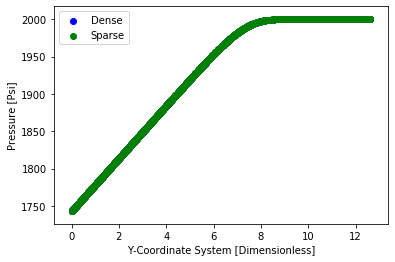

In [12]:
SolverEx3=RadialDiffusivityEquationSolver(N=1000)
y2, r2 = SolverEx3.y_midpoints, SolverEx3.r_midpoints
rhs_dense2 = SolverEx3.rhs_dense()/solver.psi_to_pa_
rhs_sparse2 = SolverEx3.rhs_sparse()/solver.psi_to_pa_



plt.scatter(y2, rhs_dense2,color='b',label="Dense")
plt.scatter(y2, rhs_sparse2,color='g',label="Sparse")
plt.xlabel("Y-Coordinate System [Dimensionless]")
plt.ylabel("Pressure [Psi]")
plt.legend()

plt.show()

In [21]:
%timeit SolverEx3.rhs_dense()/solver.psi_to_pa_
%timeit SolverEx3.rhs_sparse()/solver.psi_to_pa_

153 ms ± 8.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.31 ms ± 68.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


#### Comments
- The results provided by part 2 & part 3 in terms of efficiency of the dense and sparse matrix methods yield similiar results - This being the sparse method as a clear-winner. This is again attributed to not storing numbers in the diagonals. Fewer calculation are required allowing the simulation time to always be lower than observed in the dense approach. One point to comment on is that when we increased the grid discretization to 1,000 vs 100 (N), we do see the sparse approach reduce in efficiency, however it remained ~150X faster than the  dense matrix when arriving at the same solution.




# <u><font color=red>__Exercise 4: Well Data Comparision__</font></u> 


## Introduction

Excercise 4 will discuss the use of the data extracted from the dat-file `well_test.dat` and visualize this data. Furthermore, this exercise utillizes the Taylor Expansion when determing the well pressure(s) for both the numerical and analytical solutions through all timesteps. This excercise also will touch on data storing and creation, as well as how to visualize different data containing the well pressure. We will match the numerical solution to the observed data by changing our tuning parameters(Pi, k, re). With this, we estimate these parameters. From our generated and known values, we can better predict the fluid volume in the reservoir along with our reservoir quality(k). 


### Part 1
#### Intro
- Here, we import our data file which contains measured pressure(s) for each time step, then visualize it in a proper manner to be assesed.



Text(0.5, 1.0, 'Well test data')

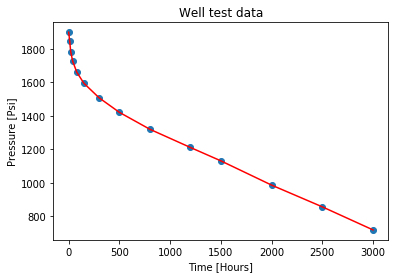

In [7]:


#f = open('data\well_test.dat', 'r')
df = pd.read_csv(r'C:\Users\muski\Desktop\prosjekt_2_ny\well_test.dat', skiprows = 3, sep = '\t')

plt.scatter(df['time'], df['well_pressure'],)
plt.plot(df['time'],df['well_pressure'],'r')
plt.xlabel('Time [Hours]')
plt.ylabel("Pressure [Psi]")
plt.title("Well test data")

#### Comments
- We can observe that the intial well pressure was the most significant pressure in this graph, while the well is being worked on the pressure is depleted from the reservoir. After some intial phase around time 100 Hours, we can see that the line slowly begins turning into a linear downgrading line. The well_pressure is constantly depleting at a constant rate from this point on. This makes perfect sense that the pressure will drop in this case as it is being exposed to the well processes (production at a constant flow rate).

### Part 2
#### Intro

`!! Done within the class RadialDiffusivityEquationSolver !!`

- Creation of a function which will estimate the observable well pressure(s) distributed inside the reservoir. Tthis function is derived by equation(20) using the step size of `dy/2`. `self.beta`. The RadialDiffusivityClass provided a good example to utilize this step size, simply by dividing by 2 equals `self.beta/2`.

Using the boundary condition: $$ \frac{dP}{dy} = \frac{Q\mu}{2\pi hk} $$

And sustituting dy for dy/2 as we are moving half a grid size

$$ \frac{p_0 - p_w}{\triangle y/2} = \frac{Q\mu}{2\pi hk} $$

$$ p_0 - p_w = \frac{\triangle y Q\mu}{4\pi hk} $$

Then using the equation for beta: $$ \beta = \frac{\triangle y Q\mu}{2\pi hk} $$
$$ p_w = p_0 - \frac{\beta}{2}$$

## This is an equation for the well pressure.

#### Comments
- At first the `p_array_res(self)` generates the pressure distrubution throughout the reservoir for all timesteps. This function is used in well pressure function as well as in combination with the equation above to estimate the well pressure for all desired timesteps. There exists another function which also estimates the well pressure using the Analytical solution. 

### Part 3
#### Intro
`!! Done within the class RadialDiffusivityEquationSolver !!`

- This part is performed by the creation of a function named well_pressure() and well_pressure_ana() in which it calculated the well pressure specifically using both the numerical and anytical solutions respectively, which has been previously mentioned in part 2.

#### Comments
- $P_w$ = pressure_res[n,0]-self.beta/2 has already been mentioned as calculating the resulting pressures. This will serve as `pressure_res[n,0]`, itterating through each row in the matrix. The result of $P_w$ is then appended onto the empty bracket of `well_p`. This will fill its respective list with pressures from each iteration and store the data here.

### Part 4
#### Intro
- The main objective of this part is to adjust the previosuly created function to match the reservoir properties of the physical data. The adjustment should be realisticly in terms of changes in intial pressue $P_i$ and permeability $k$.

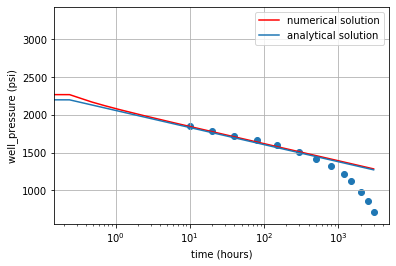

In [8]:
solver2 = RadialDiffusivityEquationSolver(100, dt = 0.010, max_time=3000/24, pi = 3300, k = 90)

solver2.plot_numerical_and_analytical_solution_against_data()



#### Comments
- To set the new boundary condition, it has been determined in order to shift the analytical & numerical plot to match the physical data. Permeability has been heavily changed by `k=500` to `k=90` mD, intial reservoir pressure has also been affected to make this shift possible :`pi=2000` psi to `pi=3300` psi. Max_time is converted over from [hours] to [days] Analyzing both plots, both follow a similiar trend, however in early time ( t<10 hours ) the numerical solution is slightly larger. When comparing the well pressure(s) in late time ( t>300 hours ), both numerical and analytical solutions yield over-lapping results yet sharply diverge from the observed well pressure data.

### Part 5
#### Intro
- In this part we apply the previously created function of the plot_numerical_and_analytical_solution_against_data(), but we're adjusting the radius of the reservoir to match the data extracted from file. Therefor, we need to set new boundary conditions to replicate the physical data more closely.

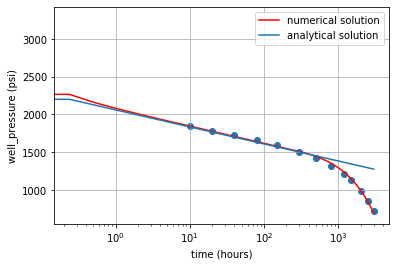

The estimated volume of the reservoir is: 3943966.328697463 m^3


In [9]:
solver2 = RadialDiffusivityEquationSolver(100, dt = 0.010, max_time=3000/24, pi = 3300, k = 90, re = 4200)

solver2.plot_numerical_and_analytical_solution_against_data()

solver2.volume()

print("The estimated volume of the reservoir is:",solver2.volume(),"m^3")

#### Comments
- The decline phase of the pressure indicates where the end of the reservoir is, thats why `re=4,200` ft to make the numerical approach relate to a physical relevance. When observering the plot generated by `plot_numerical_and_analytical_solution_against_data()` from the parameters set by `solver2`, we can observe by adjusting re=4,200 ft allows our numerical approach to be spot on with physically-measured data. However, the analytical solution is still included within this plot to show that a characteristic of the analytical solution assumes the reservoir as infinite, and will not approach a decline phase of similar manner.
- A function was created `In RadialDiffusivityEquationSolver class` named `volume()`, this function provides estimation of the total volume of fluids contained within the reservoir. This volume and the calculations within the function are given in SI-units which returnes a total fluid volume of `3,943,966.328697463 m^3` within our reservoir.

# <u><font color=blue>__Conclusion:__</font></u> 

### Project Outcomes, Further Applications, and Limitation(s):
### Excercise 1
`Outcome:`  Properly extracted data from provided file and the visualization of this extracted data. Implementation of linear regression proves to be useful in terms of finding the plots attributes, such as slope, r & p values and the standard deviation of the line. That particularlly applies to the reservoir permeability since it is of such great importance for fluid flow. 

`Limitations:` We have assumed steady-state flow and because we have utilized linear regression, there will always be a high degree of uncertainty (especially with fewer data points). We neglect gravity and capillary forces as well, these both would have an impact on our plot trend. We also have ignored the frictional change in pressure when producing at a constant rate (Q).  

`Further applications:` This application can be used to predict the continuation of different topic(s), for example a predicted continuation of a reservoir or an expected temperature change if there is generated a regression line for a plot of data for these topics. This approach must also use the new data as input to provide information by about the estimated slope of a real world problem, this kind of data would greatly support determing the pressure of a known aquifer or reducing the uncertainty of our assumed boundary conditions (constant pressure boundary / contant flux boundary.)

### Excercise 2
`Outcome:` This exercise sought to develope an analytical solver using line source solution. Throughout this exercise, we created and implement new variable(s) and function(s) within the class of RadialDiffusivityEquationSolver. We stored all necessary data within the class without the need to globally define the functions, their values, and respective variable(s). The primary result was the development of a generally defined solver, in which it was only necessary to provide inputs to the formula. This means the class became helpful when comparing our numerical solutions. Another key result was our coordinate transformation; This is due to our cylindrical reservoir shape and reservoir flow provided a producer exists in the center. 

`Limitations:` We are assuming within our analytical solver that we were to model an indefinitely large reservoir. We assume that Darcy's Law combined with the diffusivity equation properly capture the fluid flow. We are also assuming single-phase reservoir as we do not assume there has been any gas that has come out of solution (reached the bubble point). Also, a key assumption is our well does not experience any Skin-Effects / Frictional losses. 

`Further applications:` The results from this exercise can be directly utilized to a variety of other situations that may occur in our reservoir without the need to construct all previous calculations again. This may be useful for determining the pressure at a given well during a point in its future production. This is relevent due to the desire of oil companies to prevent multi-phase behavior and stave off unnecessary well maintenance project(s). 
### Excercise 3
`Outcome:` Creation of matrices & their right-hand-side in order to numerically generate pressures: This included  two methods which would produce the similar result as the analytical solution, the sparse and dense matrix solvers. Upon comparing our solutions, the efficency of the methods was clearly observed (Particularly with the sparse matrix proving to be most efficient).

`Limitations:` Very similiar assumptions from Exercise 2 are valid to this Exercise, albeit the fact we do not assume our reservoir is of infinite size. 1 boundary condition is heavily reliant on the fact that there is no flow of fluids at the reservoir limit (dP/dr = 0). There is also the assumption that at our wellbore (r=rw) there is a consistant Q being produced. 

`Further applications:` The functions created in this excercise can be adapted to real world problem(s), to do so there could be done several adjustments in its parameter values, example intial pressure and permeability and time. An example of this may be solving for the heat at various times new a new geothermal vent. This is very much applicable given the diffusivity equation it treated in a similar manner - Especially given we can apply the implicit discretization method.
### Excercise 4
`Outcome:` The result was intended to compare and contrast our plots of calculated well pressure against observed values. Given the option to modify key parameters such as Initial Reservoir Pressure (Pi), Permeability (k), and the reservoir extent (re). With these 3 variables, we were able to have a closer match when comparing our simulated vs observed pressures over the time interval (0-3,000 hours). We then used these matched parameters when computing an estimation of the total volume of fluid contained within the reservoir. 

`Limitations:` All assumptions from Exercise 3 still hold and it is important to note that the best-fit parameters were found esentially via trial and error. It is also important to mention that our reservoir is assumed homogeneous with a constant k. Having a varying k within a known threshhold is something that'd help improve the accuracy of pressure distribution from the wellbore to the reservoir's extent. The reservoir is also assumed to be cylindrical given our well is directly in the center. 

`Further applications:` Can be adaptable to new reservoir settings, although it would be required to adjust key parameters again in order to match the new reservoir properties such as fluid densities, rock compressibility, and wellbore effects such as skin.

# <u><font color=blue>__References:__</font></u> 

#### Work Cited:
- "Transport in Porous Media - From laboratory Scale to Field Scale":
  - R. F. Krueger. An Overview of Formation Damage and Well Productivity in Oilfield Operations: an Update, SPE California Regional Meeting, 1988.
  - J. Lee, J. B. Rollins and J. P. Spivey. Pressure Transient Testing, Richardson, Tex.: Henry L. Doherty Memorial Fund of AIME, Society of Petroleum Engineers, 2003.
  - A. Sulak and J. Danielsen. Reservoir Aspects of Ekofisk Subsidence, Offshore Technology Conference, 1988.
  - L. Tosi, P. Teatini and T. Strozzi. Natural Versus Anthropogenic Subsidence of Venice, Scientific reports, 3(1), pp. 1-9, 2013.
  - M. K. Hubbert. Darcy's Law and the Field Equations of the Flow of Underground Fluids, Transactions of the AIME, 207(01), pp. 222-239, 1956.
  
- https://github.com/ahiorth/CompEngineering/tree/master/projects/H20/project2 

















.